# Laboratorio 6
## Universidad del Valle de Guatemala <br> Facultad de Ingeniería
#### Departamento de Ciencias de la Computación <br> Data Science - Sección 10
#### Cristian Laynez

## Problema 2 - Popularidad de Bernardo Arévalo y de Sandra Torres

In [2]:
# Importar librerias
import pandas as pd
import nltk
import re
import networkx as nx
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import ast

In [3]:
from nltk import bigrams
from nltk import ngrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [4]:
from textblob import TextBlob

In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\crist\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\crist\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\crist\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
stop_words = set(stopwords.words('spanish'))
stop_words

{'a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'como',
 'con',
 'contra',
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'donde',
 'durante',
 'e',
 'el',
 'ella',
 'ellas',
 'ellos',
 'en',
 'entre',
 'era',
 'erais',
 'eran',
 'eras',
 'eres',
 'es',
 'esa',
 'esas',
 'ese',
 'eso',
 'esos',
 'esta',
 'estaba',
 'estabais',
 'estaban',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estado',
 'estados',
 'estamos',
 'estando',
 'estar',
 'estaremos',
 'estará',
 'estarán',
 'estarás',
 'estaré',
 'estaréis',
 'estaría',
 'estaríais',
 'estaríamos',
 'estarían',
 'estarías',
 'estas',
 'este',
 'estemos',
 'esto',
 'estos',
 'estoy',
 'estuve',
 'estuviera',
 'estuvierais',
 'estuvieran',
 'estuvieras',
 'estuvieron',
 'estuviese',
 'estuvieseis',
 'estuviesen',
 'estuvieses',
 'estuvimos',
 'estuviste',
 'estuvisteis',
 'estuviéramos',
 'estuviésemos',
 'estuvo',
 'está',
 'estábamos',
 'estáis',
 'están',
 'estás',
 'esté',
 'estéis',
 'estén',
 'estés',
 'fue',
 'f

#### 2. Cargar los archivos de datos.

In [9]:
df_sandra = pd.read_csv("./data/sandraTorres.csv", encoding='utf-8')
df_sandra

,Unnamed: 0,id,id_str,url,date,user,lang,rawContent,replyCount,retweetCount,...,quotedTweet,place,coordinates,inReplyToTweetId,inReplyToUser,source,sourceUrl,sourceLabel,media,_type
0,0,1701686249797345422,1701686249797345422,https://twitter.com/Yeya16155804/status/170168...,2023-09-12 19:56:32+00:00,"{'id': 1213902343311245313, 'id_str': '1213902...",es,@bernardosilvagt @BArevalodeLeon @DrGiammattei...,0,0,...,NaN,NaN,NaN,1.701683e+18,"{'id': 3337026291, 'username': 'bernardosilvag...","<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.Tweet
1,1,1701686065361215632,1701686065361215632,https://twitter.com/Palomin17772524/status/170...,2023-09-12 19:55:48+00:00,"{'id': 1420560045323038720, 'id_str': '1420560...",es,@_awskl @mjcabrerar @BArevalodeLeon @TSEGuatem...,0,0,...,NaN,NaN,NaN,1.701685e+18,"{'id': 390988524, 'username': '_awskl', 'displ...","<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.Tweet
2,2,1701176209076609121,1701176209076609121,https://twitter.com/iRizhao/status/17011762090...,2023-09-11 10:09:49+00:00,"{'id': 1533663614770421761, 'id_str': '1533663...",en,The 2023 National Race Walking Championship &a...,5,34,...,NaN,NaN,NaN,NaN,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,{'photos': [{'url': 'https://pbs.twimg.com/med...,snscrape.modules.twitter.Tweet
3,3,1701684889081307215,1701684889081307215,https://twitter.com/_awskl/status/170168488908...,2023-09-12 19:51:07+00:00,"{'id': 390988524, 'id_str': '390988524', 'url'...",es,@Palomin17772524 @mjcabrerar @BArevalodeLeon @...,1,0,...,NaN,NaN,NaN,1.701684e+18,"{'id': 1420560045323038720, 'username': 'Palom...","<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.Tweet
4,4,1701684719815970972,1701684719815970972,https://twitter.com/Mr_andrew89/status/1701684...,2023-09-12 19:50:27+00:00,"{'id': 454924874, 'id_str': '454924874', 'url'...",es,@ASolaresM @Mike051270 @BArevalodeLeon Otro es...,0,0,...,NaN,NaN,NaN,1.701329e+18,"{'id': 310913844, 'username': 'ASolaresM', 'di...","<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.Tweet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5779,5779,1592887211166691330,1592887211166691330,https://twitter.com/feranleu/status/1592887211...,2022-11-16 14:28:00+00:00,"{'id': 1166137849156198401, 'id_str': '1166137...",es,@amilcarmontejo @PMTMuniGuate #traficogt para ...,1,0,...,NaN,NaN,NaN,NaN,"{'id': 372126670, 'username': 'amilcarmontejo'...","<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,{'photos': [{'url': 'https://pbs.twimg.com/med...,snscrape.modules.twitter.Tweet
5780,5780,1592539913391677440,1592539913391677440,https://twitter.com/PublinewsGT/status/1592539...,2022-11-15 15:27:57+00:00,"{'id': 710243881409839104, 'id_str': '71024388...",es,#AHORA Dos buses extraurbanos colisionaron en ...,0,0,...,NaN,NaN,NaN,NaN,NaN,"<a href=""https://about.twitter.com/products/tw...",https://about.twitter.com/products/tweetdeck,TweetDeck,"{'photos': [], 'videos': [{'thumbnailUrl': 'ht...",snscrape.modules.twitter.Tweet
5781,5781,1592539903635906562,1592539903635906562,https://twitter.com/EmisorasUnidas/status/1592...,2022-11-15 15:27:55+00:00,"{'id': 40256008, 'id_str': '40256008', 'url': ...",es,#AHORA Dos buses extraurbanos colisionaron en ...,0,0,...,NaN,NaN,NaN,NaN,NaN,"<a href=""https://about.twitter.com/products/tw...",https://about.twitter.com/products/tweetdeck,TweetDeck,"{'p

In [10]:
df_bernardo = pd.read_csv("./data/bernardoArevalo.csv", encoding='utf-8')
df_bernardo

,Unnamed: 0,id,id_str,url,date,user,lang,rawContent,replyCount,retweetCount,...,quotedTweet,place,coordinates,inReplyToTweetId,inReplyToUser,source,sourceUrl,sourceLabel,media,_type
0,0,1702109621899407575,1702109621899407575,https://twitter.com/eltuitdehoy_/status/170210...,2023-09-13 23:58:52+00:00,"{'id': 46561608, 'id_str': '46561608', 'url': ...",es,@AnonGTReloaded @msemillagt @BArevalodeLeon ja...,0,0,...,NaN,NaN,NaN,1.702089e+18,"{'id': 1419402501212811265, 'username': 'AnonG...","<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.Tweet
1,1,1702109505947865192,1702109505947865192,https://twitter.com/totitafuentes/status/17021...,2023-09-13 23:58:24+00:00,"{'id': 1005627722, 'id_str': '1005627722', 'ur...",es,@ASIERVERA @AztecaNoticiaGT @BArevalodeLeon Do...,0,1,...,NaN,NaN,NaN,1.702056e+18,"{'id': 291888009, 'username': 'ASIERVERA', 'di...","<a href=""http://twitter.com/#!/download/ipad"" ...",http://twitter.com/#!/download/ipad,Twitter for iPad,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.Tweet
2,2,1701995859229958189,1701995859229958189,https://twitter.com/DrDavidCabrera/status/1701...,2023-09-13 16:26:49+00:00,"{'id': 743252657083650048, 'id_str': '74325265...",es,"Paciente de 39 años, dolor lumbar de 1 año tra...",2,17,...,NaN,NaN,NaN,NaN,NaN,"<a href=""https://help.twitter.com/en/using-twi...",https://help.twitter.com/en/using-twitter/how-...,advertiser-interface,{'photos': [{'url': 'https://pbs.twimg.com/med...,snscrape.modules.twitter.Tweet
3,3,1702109134387134664,1702109134387134664,https://twitter.com/Fernand0483/status/1702109...,2023-09-13 23:56:55+00:00,"{'id': 1512621569834688513, 'id_str': '1512621...",es,@VicZacariasGT @soy_502 @BArevalodeLeon @msemi...,0,0,...,NaN,NaN,NaN,1.701799e+18,"{'id': 84055675, 'username': 'VicZacariasGT', ...","<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,{'photos': [{'url': 'https://pbs.twimg.com/med...,snscrape.modules.twitter.Tweet
4,4,1702108943495926143,1702108943495926143,https://twitter.com/MaxTiger502/status/1702108...,2023-09-13 23:56:10+00:00,"{'id': 891058586, 'id_str': '891058586', 'url'...",es,@Igor_Bitkov No le sigan el juego a este ruso ...,1,0,...,NaN,NaN,NaN,1.701898e+18,"{'id': 707086237753090048, 'username': 'Igor_B...","<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.Tweet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4207,4207,1599825232885432329,1599825232885432329,https://twitter.com/PublinewsGT/status/1599825...,2022-12-05 17:57:13+00:00,"{'id': 710243881409839104, 'id_str': '71024388...",es,#AHORA Accidente de tránsito en el bulevar La ...,1,0,...,NaN,NaN,NaN,NaN,NaN,"<a href=""https://about.twitter.com/products/tw...",https://about.twitter.com/products/tweetdeck,TweetDeck,"{'photos': [], 'videos': [{'thumbnailUrl': 'ht...",snscrape.modules.twitter.Tweet
4208,4208,1599825218129858561,1599825218129858561,https://twitter.com/EmisorasUnidas/status/1599...,2022-12-05 17:57:09+00:00,"{'id': 40256008, 'id_str': '40256008', 'url': ...",es,#AHORA Accidente de tránsito en el bulevar La ...,0,0,...,NaN,NaN,NaN,NaN,NaN,"<a href=""https://about.twitter.com/products/tw...",https://about.twitter.com/products/tweetdeck,TweetDeck,"{'photos': [], 'videos': [{'thumbnailUrl': 'ht...",snscrape.modules.twitter.Tweet
4209,4209,1599822589555544064,1599822589555544064,https://twitter.com/LuisferGilMejia/status/159...,2022-12-05 17:46:43+00:00,"{'id': 213043803, 'id_str': '213043803', 'url'...",es,#traficogt patrulla empotrada en vía del Trans...,9,8,...,NaN,NaN,NaN,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,{'photos': [{'url': 

In [11]:
# Ver todas las columnas
data_frame_columns = df_sandra.columns.tolist()
data_frame_columns

['Unnamed: 0',
 'id',
 'id_str',
 'url',
 'date',
 'user',
 'lang',
 'rawContent',
 'replyCount',
 'retweetCount',
 'likeCount',
 'quoteCount',
 'conversationId',
 'hashtags',
 'cashtags',
 'mentionedUsers',
 'links',
 'viewCount',
 'retweetedTweet',
 'quotedTweet',
 'place',
 'coordinates',
 'inReplyToTweetId',
 'inReplyToUser',
 'source',
 'sourceUrl',
 'sourceLabel',
 'media',
 '_type']

In [12]:
data_frame_columns = df_bernardo.columns.tolist()
data_frame_columns

['Unnamed: 0',
 'id',
 'id_str',
 'url',
 'date',
 'user',
 'lang',
 'rawContent',
 'replyCount',
 'retweetCount',
 'likeCount',
 'quoteCount',
 'conversationId',
 'hashtags',
 'cashtags',
 'mentionedUsers',
 'links',
 'viewCount',
 'retweetedTweet',
 'quotedTweet',
 'place',
 'coordinates',
 'inReplyToTweetId',
 'inReplyToUser',
 'source',
 'sourceUrl',
 'sourceLabel',
 'media',
 '_type']

#### 3. Limpie y preprocese los datos (Describir de forma detallada las actividades de preprocesamiento que se llevó a cabo)

In [13]:
def remove_emojis(text):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE
    )
    return emoji_pattern.sub(r'', text)

def remove_stopwords(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

def get_stemmed_text(text):    
    stemmer = PorterStemmer()
    words = word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

def apply_lemmatization(text):
    lemmatizer = WordNetLemmatizer()
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

def remove_numbers(text):
    return re.sub(r'\d+', '', text)

def clean_all_text_of_column(column_name : str, data_frame):
    # Convertir el texto en minúsculas
    data_frame[column_name] = data_frame[column_name].str.lower()

    # Quitar caracteres especiales “#”,”@” o los apóstrofes
    data_frame[column_name] = data_frame[column_name].str.replace(r'[#@\'"]', '', regex=True)

    # Quitar urls
    data_frame[column_name] = data_frame[column_name].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', regex=True)

    # Eliminar signos de puntuacion
    data_frame[column_name] = data_frame[column_name].str.replace(r'[^\w\s]', '', regex=True)

    # Revisar si hay emojis en el texto y luego quitarlos
    data_frame[column_name] = data_frame[column_name].apply(remove_emojis)

    # Quitar los artículos, preposiciones y conjunciones (stopwords)
    data_frame[column_name] = data_frame[column_name].apply(remove_stopwords)

    # Normalizar las palabras para tratar de convertir todas las palabras encontradas en solo una palabra
    data_frame[column_name] = data_frame[column_name].apply(get_stemmed_text)

    # Aplicar la función de lematización al atributo 'text' para identificar la parte
    # del discurso de una palabra determinada y luego aplicando reglas más complejas 
    # para transformar la palabra en su verdadera raíz
    data_frame[column_name] = data_frame[column_name].apply(apply_lemmatization)

    # # Quitar los numeros para evitar que interfieran en el análisis
    data_frame[column_name] = data_frame[column_name].apply(remove_numbers)

In [14]:
def clean_all_data_frame(data_frame):
    list_usernames = []
    list_raw_descriptions = []

    # username, displayname, rawDescription
    for user_value in data_frame["user"]:
        username_pattern = r"'username': '([^']+)'"
        raw_description_pattern = r"'rawDescription': '([^']+)'"

        usernames = re.findall(username_pattern, user_value)
        raw_descriptions = re.findall(raw_description_pattern, user_value)
        
        list_usernames.append(usernames[0])
        list_raw_descriptions.append("-1" if len(raw_descriptions) == 0 else raw_descriptions[0])

    data_frame["username"] = list_usernames
    data_frame["rawDescription"] = list_raw_descriptions

    # Eliminar las siguientes columnas
    columns_to_delete = [
        "Unnamed: 0", "url", "id_str", "coordinates", 
        "inReplyToTweetId", "inReplyToUser", "media",
        "_type", "conversationId", "cashtags", "links",
        "retweetedTweet", "id", "user",
        "source", "sourceUrl", "quotedTweet"
    ]

    for column in columns_to_delete:
        if column in data_frame_columns:
            data_frame.drop(column, inplace=True, axis=1)

    clean_all_text_of_column("rawContent", data_frame)
    clean_all_text_of_column("rawDescription", data_frame)

    # Convertir las cadenas de hashtags en listas
    data_frame['hashtags'] = data_frame['hashtags'].apply(ast.literal_eval)
    data_frame['hashtags']

    # Convertir los NaN de viewCount en "-1"
    data_frame['viewCount'].fillna(-1.0, inplace=True)

    # Convertir los NaN de place en "{}"
    data_frame['place'].fillna("{}", inplace=True)
    
    return data_frame

In [15]:
# Limpiar los dos data frames
df_bernardo = clean_all_data_frame(df_bernardo)
df_sandra = clean_all_data_frame(df_sandra)

In [16]:
df_bernardo

,date,lang,rawContent,replyCount,retweetCount,likeCount,quoteCount,hashtags,mentionedUsers,viewCount,place,sourceLabel,username,rawDescription
0,2023-09-13 23:58:52+00:00,es,anongtreload msemillagt barevalodeleon jajajaj...,0,0,2,0,[],"[{'id': 1419402501212811265, 'username': 'Anon...",184.0,{},Twitter Web App,eltuitdehoy_,pendient boot hdp
1,2023-09-13 23:58:24+00:00,es,asiervera aztecanoticiagt barevalodeleon do ve...,0,1,4,0,[],"[{'id': 291888009, 'username': 'ASIERVERA', 'd...",107.0,{},Twitter for iPad,totitafuentes,
2,2023-09-13 16:26:49+00:00,es,pacient año dolor lumbar año tra caída hizo ...,2,17,91,0,[],[],47277.0,{},advertiser-interface,DrDavidCabrera,médico especialista medicina deportiva rehabil...
3,2023-09-13 23:56:55+00:00,es,viczacariasgt soy_ barevalodeleon msemillagt c...,0,0,0,0,[],"[{'id': 84055675, 'username': 'VicZacariasGT',...",-1.0,{},Twitter for Android,Fernand0483,
4,2023-09-13 23:56:10+00:00,es,igor_bitkov sigan juego ruso invasor enero sol...,1,0,5,0,[],"[{'id': 707086237753090048, 'username': 'Igor_...",69.0,{},Twitter for Android,MaxTiger502,viajando dimensión
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4207,2022-12-05 17:57:13+00:00,es,ahora accident tránsito bulevar madr avenida ...,1,0,3,0,"[AHORA, TráficoGT]","[{'id': 372126670, 'username': 'amilcarmontejo...",-1.0,{},TweetDeck,PublinewsGT,
4208,2022-12-05 17:57:09+00:00,es,ahora accident tránsito bulevar madr avenida ...,0,0,10,0,"[AHORA, TráficoGT]","[{'id': 372126670, 'username': 'amilcarmontejo...",-1.0,{},TweetDeck,EmisorasUnidas,primera noticia primera deport sigu toda infor...
4209,2022-12-05 17:46:43+00:00,es,traficogt patrulla empotrada vía transmetro am...,9,8,32,0,[traficogt],"[{'id': 372126670, 'username': 'amilcarmontejo...",-1.0,{},Twitter for Android,LuisferGilMejia,derecha izquierda
4210,2022-12-05 13:09:04+00:00,es,amilcarmontejo traficogt anorm despué estadio ...,0,0,0,0,[TraficoGT],"[{'id': 372126670, 'username': 'amilcarmontejo...",-1.0,{},Twitter for Android,varrecisg,pienso despu escribo guatemalteco san carlista...


In [17]:
df_sandra

,date,lang,rawContent,replyCount,retweetCount,likeCount,quoteCount,hashtags,mentionedUsers,viewCount,place,sourceLabel,username,rawDescription
0,2023-09-12 19:56:32+00:00,es,bernardosilvagt barevalodeleon drgiammattei me...,0,0,0,0,[],"[{'id': 3337026291, 'username': 'bernardosilva...",10.0,{},Twitter for Android,Yeya16155804,
1,2023-09-12 19:55:48+00:00,es,_awskl mjcabrerar barevalodeleon tseguatemala ...,0,0,0,0,[],"[{'id': 390988524, 'username': '_awskl', 'disp...",23.0,{},Twitter Web App,Palomin17772524,dio familia patrian dislexico netcentero simpl...
2,2023-09-11 10:09:49+00:00,en,the nation race walk championship amp youth c...,5,34,647,1,"[Rizhao, RizhaoFocus]",[],52257.0,{},Twitter Web App,iRizhao,welcom to rizhao where the light of the rise s...
3,2023-09-12 19:51:07+00:00,es,palomin mjcabrerar barevalodeleon tseguatemala...,1,0,0,0,[],"[{'id': 1420560045323038720, 'username': 'Palo...",30.0,{},Twitter for Android,_awskl,amar i llo
4,2023-09-12 19:50:27+00:00,es,asolaresm mike barevalodeleon estupido cegado ...,0,0,0,0,[],"[{'id': 310913844, 'username': 'ASolaresM', 'd...",4.0,{},Twitter for iPhone,Mr_andrew89,drum tecnología pro excel master user sap anti...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5779,2022-11-16 14:28:00+00:00,es,amilcarmontejo pmtmunigu traficogt salir zona ...,1,0,0,0,[traficogt],"[{'id': 372126670, 'username': 'amilcarmontejo...",-1.0,{},Twitter for Android,feranleu,chispudo bicicleta
5780,2022-11-15 15:27:57+00:00,es,ahora do buse extraurbano colisionaron a aveni...,0,0,1,0,"[AHORA, TráficoGT]","[{'id': 372126670, 'username': 'amilcarmontejo...",-1.0,{},TweetDeck,PublinewsGT,
5781,2022-11-15 15:27:55+00:00,es,ahora do buse extraurbano colisionaron a aveni...,0,0,2,0,"[AHORA, TráficoGT]","[{'id': 372126670, 'username': 'amilcarmontejo...",-1.0,{},TweetDeck,EmisorasUnidas,primera noticia primera deport sigu toda infor...
5782,2022-11-14 16:50:12+00:00,es,viabilidad realizan trabajo cambio loza aveni...,0,0,1,0,[TraficoGT],"[{'id': 372126670, 'username': 'amilcarmontejo...",-1.0,{},Twitter for Android,muniauxiliarz1,alcaldía auxiliar espacio participación ciudad...


#### 4. Análisis exploratorio y serie de insights que se puedan seguir investigando

In [18]:
# En los idiomas donde se habla de Arévalo
lang_count = df_bernardo["lang"].value_counts()
lang_count

lang
es    3938
en     266
in       3
ar       2
zh       2
ja       1
Name: count, dtype: int64

In [19]:
# En los idiomas donde se habla de Sandra Torres
lang_count = df_sandra["lang"].value_counts()
lang_count

lang
es     5460
en      293
pt       14
zxx       4
in        3
fr        2
qme       2
zh        1
lt        1
it        1
ja        1
ar        1
ko        1
Name: count, dtype: int64

Se puede apreciar como es que Sandra Torres es más conocida que Arévalo, con Sandra se habla en más regiones y así.

In [20]:
# Cantidad de dispositivos en donde se crean los tweets respecto a Arévalo
df_bernardo["sourceLabel"].value_counts()

sourceLabel
Twitter for Android               1904
Twitter for iPhone                 880
Twitter Web App                    563
TweetDeck Web App                  320
advertiser-interface               202
TweetDeck                          135
Twitter for Advertisers            132
simpleads-ui                        16
Twitter for iPad                    15
Emplifi                              7
hivemedia-ads-crud                   7
Hootsuite Inc.                       6
SocialFlow                           5
Tweet Hunter Pro                     4
Twitter Media Studio                 3
Buffer                               3
prensa_libre164596692643321037       2
OneUp App                            2
Twitter Ads                          2
Sprinklr Publishing                  2
OneSight                             2
Name: count, dtype: int64

In [21]:
df_sandra["sourceLabel"].value_counts()

sourceLabel
Twitter for Android               2787
Twitter for iPhone                1217
Twitter Web App                    762
TweetDeck                          367
TweetDeck Web App                  261
advertiser-interface               183
Twitter for Advertisers            116
simpleads-ui                        19
Twitter for iPad                    16
OneSight                             6
hivemedia-ads-crud                   6
Emplifi                              5
lahoragt1644885914282258435          5
Sprinklr Publishing                  5
Buffer                               4
Twitter Media Studio                 4
Hootsuite Inc.                       4
Twitter Ads                          3
SocialFlow                           3
Twitter for Mac                      3
Brandwatch                           3
República App                        1
OneUp App                            1
prensa_libre164596692643321037       1
Tweet Hunter Pro                     1
EL PAÍS Echob

Se puede ver nuevamente que indiscutiblemente los móviles son el pilar más fuerte para Twiter.

In [22]:
bernardo_content = df_bernardo[df_bernardo["lang"] == "es"]["rawContent"]

tokens_bernardo = word_tokenize(' '.join(bernardo_content))

freq_bernardo = FreqDist(tokens_bernardo)

print("Palabras más comunes en el contenido de los tweets de Arevalo")
for word, frequency in freq_bernardo.most_common(20):
    print(f"=> |{word}| : {frequency}")

Palabras más comunes en el contenido de los tweets de Arevalo
=> |barevalodeleon| : 2677
=> |amilcarmontejo| : 905
=> |zona| : 543
=> |ahora| : 538
=> |msemillagt| : 527
=> |traficogt| : 487
=> |vía| : 472
=> |tráficogt| : 459
=> |drgiammattei| : 423
=> |si| : 413
=> |president| : 382
=> |avenida| : 340
=> |call| : 335
=> |solo| : 315
=> |guatemala| : 314
=> |karinherreravp| : 293
=> |a| : 257
=> |pueblo| : 255
=> |mmendoza_gt| : 245
=> |mpguatemala| : 240


In [23]:
sandra_content = df_sandra[df_sandra["lang"] == "es"]["rawContent"]

tokens_sandra = word_tokenize(' '.join(sandra_content))

freq_sandra = FreqDist(tokens_sandra)

print("Palabras más comunes en el contenido de los tweets de Sandra")
for word, frequency in freq_sandra.most_common(20):
    print(f"=> |{word}| : {frequency}")

Palabras más comunes en el contenido de los tweets de Sandra
=> |barevalodeleon| : 2797
=> |amilcarmontejo| : 1450
=> |traficogt| : 893
=> |sandratorresgua| : 860
=> |zona| : 793
=> |ahora| : 738
=> |tráficogt| : 660
=> |vía| : 594
=> |drgiammattei| : 588
=> |si| : 507
=> |msemillagt| : 494
=> |call| : 471
=> |avenida| : 471
=> |president| : 437
=> |guatemala| : 409
=> |solo| : 378
=> |a| : 373
=> |mpguatemala| : 344
=> |pueblo| : 334
=> |karinherreravp| : 293


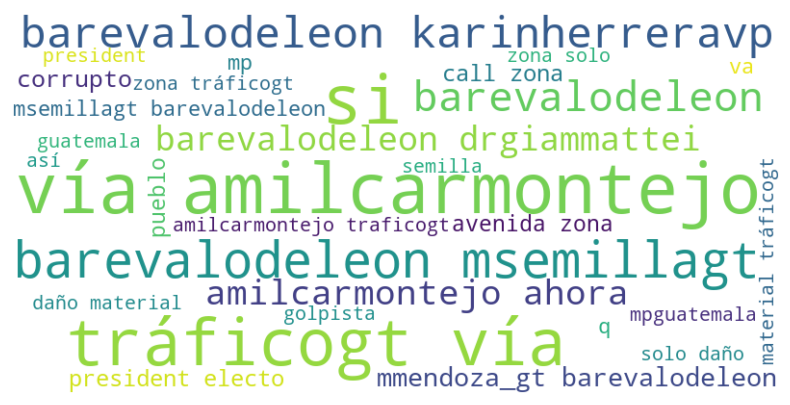

In [24]:
# Combina todos los textos en uno solo (si tus textos están en una lista)
combined_text_rawContent = ' '.join(df_bernardo["rawContent"])

# Configura la nube de palabras
wordcloud = WordCloud(
    background_color='white',  # Color del fondo
    width=800, height=400,     # Tamaño de la imagen de la nube de palabras
    max_words=30,             # Número máximo de palabras en la nube
).generate(combined_text_rawContent)

# Muestra la nube de palabras en una figura de matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Oculta los ejes
plt.show()

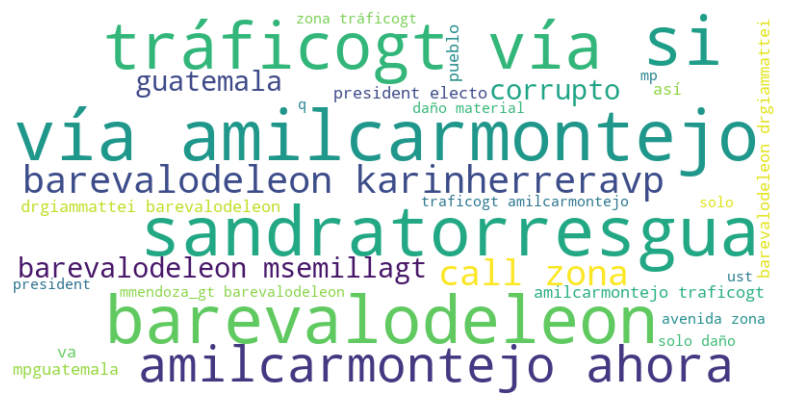

In [25]:
# Combina todos los textos en uno solo (si tus textos están en una lista)
combined_text_rawContent = ' '.join(df_sandra["rawContent"])

# Configura la nube de palabras
wordcloud = WordCloud(
    background_color='white',  # Color del fondo
    width=800, height=400,     # Tamaño de la imagen de la nube de palabras
    max_words=30,             # Número máximo de palabras en la nube
).generate(combined_text_rawContent)

# Muestra la nube de palabras en una figura de matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Oculta los ejes
plt.show()

In [26]:
bigrams_bernardo = list(bigrams(tokens_bernardo))

freq_bernardo = FreqDist(bigrams_bernardo)

print('Bigramas más comunes de Bernardo Arevalo:')
for word, frequency in freq_bernardo.most_common(20):
    print(f'{word}: {frequency}')

Bigramas más comunes de Bernardo Arevalo:
('vía', 'amilcarmontejo'): 395
('tráficogt', 'vía'): 343
('barevalodeleon', 'msemillagt'): 295
('barevalodeleon', 'karinherreravp'): 279
('amilcarmontejo', 'ahora'): 248
('barevalodeleon', 'drgiammattei'): 227
('mmendoza_gt', 'barevalodeleon'): 215
('president', 'electo'): 168
('call', 'zona'): 163
('avenida', 'zona'): 151
('a', 'avenida'): 128
('msemillagt', 'barevalodeleon'): 127
('amilcarmontejo', 'traficogt'): 122
('solo', 'daño'): 119
('daño', 'material'): 119
('material', 'tráficogt'): 110
('a', 'call'): 109
('zona', 'tráficogt'): 108
('zona', 'solo'): 101
('inscríbet', 'hoy'): 99


In [27]:
bigrams_sandra = list(bigrams(tokens_sandra))

freq_sandra = FreqDist(bigrams_sandra)

print('Bigramas más comunes de Sandra Torres:')
for word, frequency in freq_sandra.most_common(20):
    print(f'{word}: {frequency}')

Bigramas más comunes de Sandra Torres:
('vía', 'amilcarmontejo'): 460
('tráficogt', 'vía'): 402
('amilcarmontejo', 'ahora'): 303
('barevalodeleon', 'karinherreravp'): 270
('call', 'zona'): 247
('barevalodeleon', 'msemillagt'): 213
('amilcarmontejo', 'traficogt'): 204
('drgiammattei', 'barevalodeleon'): 199
('barevalodeleon', 'drgiammattei'): 183
('a', 'avenida'): 179
('president', 'electo'): 175
('mmendoza_gt', 'barevalodeleon'): 168
('avenida', 'zona'): 165
('traficogt', 'amilcarmontejo'): 163
('zona', 'tráficogt'): 159
('a', 'call'): 154
('daño', 'material'): 127
('solo', 'daño'): 126
('mike', 'barevalodeleon'): 117
('accident', 'tránsito'): 110


In [28]:
trigrams_bernardo = list(ngrams(tokens_bernardo, 3))

freq_bernardo = FreqDist(trigrams_bernardo)

print('Trigramas de 3 palabras más comunes de Bernardo Arevalo:')
for word, frequency in freq_bernardo.most_common(20):
    print(f'{word}: {frequency}')

Trigramas de 3 palabras más comunes de Bernardo Arevalo:
('tráficogt', 'vía', 'amilcarmontejo'): 339
('vía', 'amilcarmontejo', 'ahora'): 205
('mmendoza_gt', 'barevalodeleon', 'drgiammattei'): 176
('solo', 'daño', 'material'): 119
('daño', 'material', 'tráficogt'): 110
('material', 'tráficogt', 'vía'): 110
('zona', 'solo', 'daño'): 101
('zona', 'tráficogt', 'vía'): 100
('ligiaiveth', 'barevalodeleon', 'karinherreravp'): 87
('luiurbina', 'barevalodeleon', 'msemillagt'): 86
('ahora', 'accident', 'tránsito'): 81
('a', 'avenida', 'zona'): 68
('a', 'call', 'zona'): 67
('president', 'electo', 'barevalodeleon'): 65
('asiervera', 'aztecanoticiagt', 'barevalodeleon'): 62
('raulbarreragt', 'barevalodeleon', 'karinherreravp'): 51
('amilcarmontejo', 'ahora', 'accident'): 51
('avenida', 'a', 'call'): 49
('inscríbet', 'hoy', 'ute'): 47
('call', 'zona', 'tráficogt'): 46


In [29]:
trigrams_sandra = list(ngrams(tokens_sandra, 3))

freq_sandra = FreqDist(trigrams_sandra)

print('Trigramas de 3 palabras más comunes de Sandra Torres:')
for word, frequency in freq_sandra.most_common(20):
    print(f'{word}: {frequency}')

Trigramas de 3 palabras más comunes de Sandra Torres:
('tráficogt', 'vía', 'amilcarmontejo'): 392
('vía', 'amilcarmontejo', 'ahora'): 253
('mmendoza_gt', 'barevalodeleon', 'drgiammattei'): 131
('solo', 'daño', 'material'): 124
('zona', 'tráficogt', 'vía'): 124
('zona', 'solo', 'daño'): 105
('daño', 'material', 'tráficogt'): 104
('material', 'tráficogt', 'vía'): 104
('a', 'call', 'zona'): 97
('ahora', 'accident', 'tránsito'): 91
('president', 'electo', 'barevalodeleon'): 77
('a', 'avenida', 'zona'): 77
('ahora', 'amilcarmontejo', 'informa'): 75
('barevalodeleon', 'karinherreravp', 'msemillagt'): 71
('avenida', 'a', 'call'): 71
('call', 'zona', 'tráficogt'): 66
('drgiammattei', 'barevalodeleon', 'karinherreravp'): 64
('a', 'avenida', 'a'): 64
('amilcarmontejo', 'ahora', 'accident'): 63
('karinherreravp', 'msemillagt', 'jeanellydvg'): 61


In [30]:
def classify_emotions(text):
    analysis = TextBlob(text)
    sentiment = analysis.sentiment.polarity
    if sentiment > 0:
        return "Positivo"
    elif sentiment < 0:
        return "Negativo"
    
    return "Neutral"

In [31]:
df_bernardo["feeling"] = df_bernardo["rawContent"].apply(classify_emotions)
df_bernardo[["feeling", "rawContent"]]

,feeling,rawContent
0,Positivo,anongtreload msemillagt barevalodeleon jajajaj...
1,Neutral,asiervera aztecanoticiagt barevalodeleon do ve...
2,Neutral,pacient año dolor lumbar año tra caída hizo ...
3,Neutral,viczacariasgt soy_ barevalodeleon msemillagt c...
4,Neutral,igor_bitkov sigan juego ruso invasor enero sol...
...,...,...
4207,Neutral,ahora accident tránsito bulevar madr avenida ...
4208,Neutral,ahora accident tránsito bulevar madr avenida ...
4209,Neutral,traficogt patrulla empotrada vía transmetro am...
4210,Neutral,amilcarmontejo traficogt anorm despué estadio ...


In [32]:
df_sandra["feeling"] = df_sandra["rawContent"].apply(classify_emotions)
df_sandra[["feeling", "rawContent"]]

,feeling,rawContent
0,Neutral,bernardosilvagt barevalodeleon drgiammattei me...
1,Neutral,_awskl mjcabrerar barevalodeleon tseguatemala ...
2,Positivo,the nation race walk championship amp youth c...
3,Neutral,palomin mjcabrerar barevalodeleon tseguatemala...
4,Neutral,asolaresm mike barevalodeleon estupido cegado ...
...,...,...
5779,Neutral,amilcarmontejo pmtmunigu traficogt salir zona ...
5780,Neutral,ahora do buse extraurbano colisionaron a aveni...
5781,Neutral,ahora do buse extraurbano colisionaron a aveni...
5782,Neutral,viabilidad realizan trabajo cambio loza aveni...


In [33]:
opinion_bernardo = df_bernardo["feeling"].value_counts()
opinion_bernardo

feeling
Neutral     3749
Positivo     383
Negativo      80
Name: count, dtype: int64

In [34]:
opinion_sandra = df_sandra["feeling"].value_counts()
opinion_sandra

feeling
Neutral     5240
Positivo     453
Negativo      91
Name: count, dtype: int64

#### 5. Preguntas

##### ¿La opinión pública de cada uno de los candidatos es en su mayoría positiva o negativa? Puede usar comentarios para responderse esta pregunta.

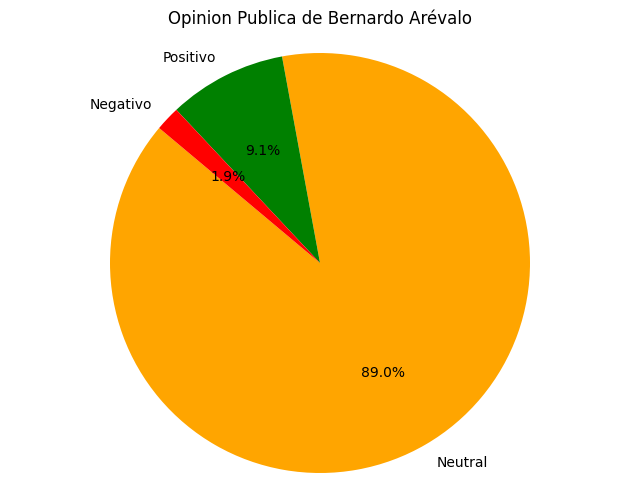

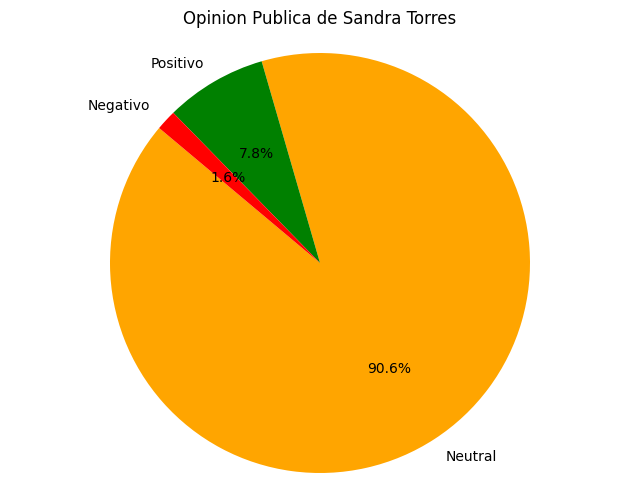

In [35]:
colors = ["orange", "green", "red"]
plt.figure(figsize=(8, 6))
plt.pie(opinion_bernardo,labels=opinion_sandra.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Opinion Publica de Bernardo Arévalo')
plt.axis('equal')
plt.show()

plt.figure(figsize=(8, 6))
plt.pie(opinion_sandra, labels=opinion_sandra.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Opinion Publica de Sandra Torres')
plt.axis('equal')
plt.show()

Como se puede observar la mayoria de la opinión pública es neutral, pero se puede observar que quien posee una mejor opinión pública positiva es Bernardo Arévalo.

##### ¿Encontró algún influencer?

In [36]:
df_top_counts = df_bernardo.sort_values(by="viewCount", ascending=False)
df_top_counts = df_top_counts[df_top_counts["viewCount"] != -1.0]
df_top_counts = df_top_counts.drop_duplicates(subset="username", keep=False)
df_top_counts[["username", "rawContent", "hashtags", "viewCount", "lang"]].head(20)

,username,rawContent,hashtags,viewCount,lang
3970,Hindawi,just publish read the latest open access resea...,"[Hindawi, OpenAccess]",11282616.0,en
1151,BcoBolivariano,quier ahorrar tiempo dinero banco bolivariano ...,[CuentaDeAhorrosOnline],7954542.0,es
4175,SelfTSuccess,i built my audienc over k follow in le than y...,[],7320369.0,en
2533,WOLF_Financial,ive host over hour of space with the brightes...,[],7176558.0,en
2538,yuanjhen_info,dont wait until it too late protect your site ...,[],4307504.0,en
3411,uicc,uicc let talk cancer podcast break down compli...,[],3831025.0,en
4141,WilliamFlashito,cubríamo emergencia médica manejaba vehículo p...,[],2766794.0,es
1186,VozdeAmerica,asociación nacion bebida refrescant venezuela ...,[VOA],1899295.0,es
3638,thodiohifi,cal bluetooth speaker watt up to hour batteri...,"[AmmoCanSpeaker, bluetoothspeaker]",1072268.0,en
3658,moradalshaif,وأعلن أن فصل الخريف هو أشد حرارة من فصل الصيف ...,[],1017333.0,ar


In [36]:
df_top_counts = df_sandra.sort_values(by="viewCount", ascending=False)
df_top_counts = df_top_counts[df_top_counts["viewCount"] != -1.0]
df_top_counts = df_top_counts.drop_duplicates(subset="username", keep=False)
df_top_counts[["username", "rawContent", "hashtags", "viewCount", "lang"]].head(20)

,username,rawContent,hashtags,viewCount,lang
1646,yuanjhen_info,check out our taiwan wordpress host enjoy reli...,[],15358634.0,en
4384,OnlyInBOS,massachusett state polic is pull over vehicl t...,[],8267899.0,en
456,UHN_Plus,rede social vida real,[],6925055.0,es
3825,juanfloreschaar,cansado noticia pesimista contrarrestar pesimi...,"[Innovación, DesarrolloHumano]",6557904.0,es
4656,Myeloma_Society,join u in athen greec from septemb for the t...,[],5033938.0,en
3845,wwweuropestudy,spanish languag free onlin cours certif,[],3977061.0,en
5538,WilliamFlashito,cubríamo emergencia médica manejaba vehículo p...,[],2766794.0,es
3934,InterpalUK,the scale of the assault unseen sinc the heigh...,[],1775471.0,en
224,evanmichaelkyle,imagin,[],1600593.0,en
3571,VozdeAmerica,aliado incómodo pelea partido comunista venezu...,[],1188399.0,es


Honestamente no conozco ninguno de estos influencers pero se puede apreciar que hay influencers que tienen demasiadas visualizaciones en sus cuentas y los más grandes son de habla inglesa.

##### ¿Cómo describiría la estructura de la red de cada uno de los candidatos, centralizada o  distribuida?

In [ ]:
bernardo_graph = nx.DiGraph()

for _, row in df_bernardo.iterrows():
    for target in (mentioned_users:= row['mentionedUsers']):
        bernardo_graph.add_edge(row['username'], target)

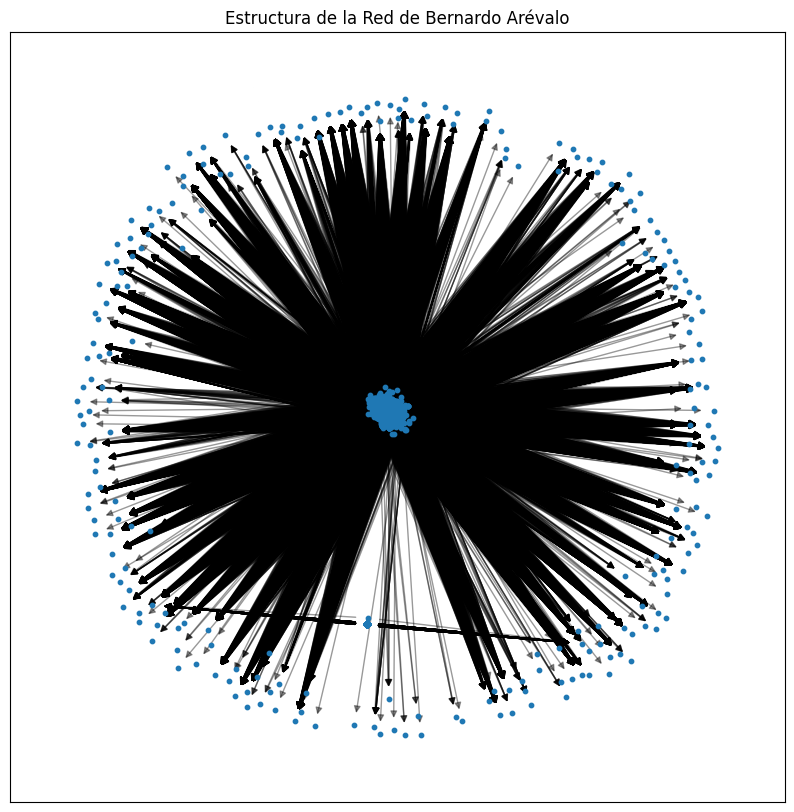

In [40]:
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(bernardo_graph)
nx.draw_networkx_nodes(bernardo_graph, pos, node_size=10)
nx.draw_networkx_edges(bernardo_graph, pos, alpha=0.4)
plt.title("Estructura de la Red de Bernardo Arévalo")
plt.show()

Segun estra estructura de la red para Bernardo Arévalo es una red centralizada, ya que hay muy pocos nodos en donde se hay distribución.

In [38]:
sandra_graph = nx.DiGraph()

for _, row in df_bernardo.iterrows():
    for target in (mentioned_users:= row['mentionedUsers']):
        sandra_graph.add_edge(row['username'], target)

In [39]:
nx.clustering(sandra_graph)

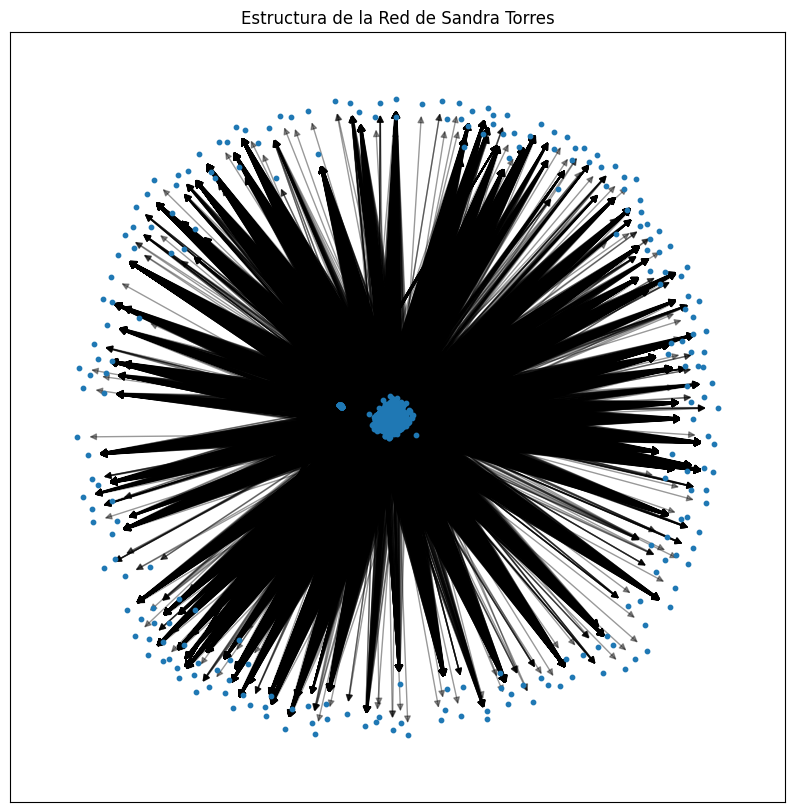

In [40]:
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(sandra_graph)
nx.draw_networkx_nodes(sandra_graph, pos, node_size=10)
nx.draw_networkx_edges(sandra_graph, pos, alpha=0.4)
plt.title("Estructura de la Red de Sandra Torres")
plt.show()

Con la estructura de Sandra Torres se puede ver que es mucho más centralizada.

##### ¿Fue durante su campaña la red social un aspecto importante para influir en la decisión de los guatemaltecos?

En efecto sí lo fue, ya que todos los usuarios estan en comunicación constante, las noticias, rumores entre otros se divulgan con mucha rápidez y facilidad. Se pudo ver como Bernardo Arévalo tiene una opinión pública positiva mayor que el de Sandra Torres. Bernardo Arévalo influyo mucho y de forma masiva en las redes sociales, esa fue la clave del porque gano las elecciones presidenciales.